# Introduction

I would like to start this article with three problems that are quite close to reality:

### The publisher problem

A publishing house received an order for 600 copies of the book "Basic Machine Learning" to Thai Binh and 400 copies to Hai Phong. That publishing house has 800 books in Nam Dinh warehouse and 700 books in Hai Duong warehouse. The price to deliver a book from Nam Dinh to Thai Binh is 50,000 VND (50k), to Hai Phong is 100k. The delivery price for a book from Hai Duong to Thai Binh is 150k, while to Hai Phong it is only 40k. To minimize delivery costs, how many books should the company distribute to each warehouse to each location?

**Analyse**

At first, I call:

<table>
    <tr>
        <td>Source</td>
        <td>Destination</td>
        <td>Cost</td>
        <td>Quantity</td>
    </tr>
    <tr>
        <td>Nam Dinh</td>
        <td>Thai Binh</td>
        <td>50k</td>
        <td>x</td>
    </tr>
    <tr>
        <td>Nam Dinh</td>
        <td>Hai Phong</td>
        <td>100k</td>
        <td>y</td>
    </tr>
    <tr>
        <td>Hai Duong</td>
        <td>Thai Binh</td>
        <td>150k</td>
        <td>z</td>
    </tr>
    <tr>
        <td>Hai Duong</td>
        <td>Hai Phong</td>
        <td>40k</td>
        <td>w</td>
    </tr>
</table>

Total cost requirement will be $f(x, y, z, w) = 50x + 100y + 150z + 40w$ with constraints:
- Shipping 600 books to Thai Binh: $x + z = 600$
- Shipping 400 books to Hai Phong: $y + w = 400$
- The number of books in Nam Dinh: $x + y \leq 800$
- The number of books in Hai Duong: $z + w \leq 700$
- $x, y, z, w \geq 0$

So to solve this we have a equation:

$$
(x, y, z, w) = \arg \min f(x, y, z, w) = 50x + 100y + 150z + 40w \\
\begin{align*}
\text{subject to: } &x + z = 600\\
&y + w = 400\\
&x + y \leq 800\\
&z + w \leq 700\\
&x, y, z, w \geq 0
\end{align*}$$

So, the cost function is a linear function, and constraints are *hyperplanes* and *halfspaces*. This is a ***linear programming*** problem.

Solution **can be**: $x = 600, y = 200, z = 0, w = 200$

### The farming problem

A farmer has a total of 10ha of arable land. He plans to grow coffee and pepper on this land with a total cost of growing no more than 16M (million VND). The cost to grow coffee is 2T per hectare, and to grow pepper is 1T per hectare. Coffee growing time is 1 day/ha and pepper growing time is 4 days/ha; while he only had a total of 32 days. After deducting all costs (including tree planting costs), each hectare of coffee brings a profit of 5T, each hectare of pepper brings a profit of 3T. How should I plant to maximize profits?

**Analyse**

Recall $x$ and $y$ is number of ha coffee and pepper, respectively. The profit  is $g(x, y) = 5x + 3y$. The constraints are:
- Total arable land: $x + y \leq 10$
- Total cost: $2x + y \leq 16$
- Total time: $x + 4y \leq 32$
- $x, y \geq 0$

With equation:

$$
(x, y) = \arg \max g(x, y) = 5x + 3y \\
\begin{align*}
\text{subject to: } &x + y \leq 10\\
&2x + y \leq 16\\
&x + 4y \leq 32\\
&x, y \geq 0
\end{align*}
$$

Another linear programming problem.

Turn out that:
- All of the math problem above, which in the form of AI or ML we call it a **convex optimization problem**.
- Hard to find a global optimal solution, most of the time we can only find a local optimal solution.
- In real life, we can't solve it by hand, we need a computer to do it.

But first we need to understand all the theory about **convex optimization** and why **convex** is important

# Recall Optimization problems

Allow me to recall optimization problems in general. An optimization problem is a problem that requires finding the best solution from all feasible solutions:

$$
\begin{align*}
\vec{x}^* = \arg \min_{\vec{x}} f_0(\vec{x}) \\
\text{subject to: } f_i(\vec{x}) &\leq 0, i = 1, 2, ..., m \\
h_j(\vec{x}) &= 0, j = 1, 2, ..., n \\
\end{align*}
$$

| Notation                                           | Term                             |
|----------------------------------------------------|----------------------------------|
| $\vec{x} \in \mathbb{R}^n$                         | Decision variable                |
| $f_0: \mathbb{R}^n \to \mathbb{R}$                 | Objective/Loss/Cost function     |
| $f_i(\vec{x}) \leq 0$                              | Inequality constraints           |
| $f_i: \mathbb{R}^n \to \mathbb{R}$                 | Inequality constraint function   |
| $h_j(\vec{x}) = 0$                                 | Equality constraints             |
| $h_j: \mathbb{R}^n \to \mathbb{R}$                 | Equality constraint function     |
| $\mathcal{D} = \bigcap_{i=0}^m \text{dom} f_i \cap \bigcap_{j=1}^n \text{dom} h_j$ | Domain of the problem |


Beside:
- When $m = n = 0$, we have an **unconstrained optimization problem**.
- $\mathcal{D}$ is the set of all feasible solutions.
- *Optimal value* of a optimization problem define as:
$$p^* = \inf{\{f_0(\vec{x}) | f_i(\vec{x}) \leq 0, h_j(\vec{x}) = 0\}}$$

Where: $\inf$ is the infimum of a set, which is the greatest lower bound of the set. If problem is infeasible, $p^* = \infty$. If target function is unbounded, $p^* = -\infty$.

### Optimal and locally optimal points

Each point $\vec{x}^*$ is called an **optimal point** if $f_0(\vec{x}^*) = p^*$. A set of all optimal points is called the **optimal set**.

If *optimal set* is a non-empty set, then we say it's *solvable*. Otherwise, if an *optimal set* is empty, then we say it's *not attained / not achieved*.

In optimization problem (usually multiple dimision), we call a point $\vec{x}^*$ is a **locally optimal point** if there exists a variable (or radius) $\mathcal{R}$ such that:

$$f_0(x) = \inf{(f_0(\vec{z}) | f_i(\vec{z}) \leq 0 \\,
h_j(\vec{z}) = 0, ||\vec{z} - \vec{x}||_2 \leq \mathcal{R})}$$

If a point feasible $x$ satisfy $f_i(x) = 0$, we said that we say that the inequality constrains $i^{th}$ is **active**. Else, if $f_i(x) < 0$, we said that the inequality constrains $i^{th}$ is **inactive**.

### Some important concepts

Optimization problems with maximizing the objective function and constraints in other forms can be reduced to this form:

- $\max f_0(x) \Leftrightarrow \min -f_0(x)$
- $f_i(x) \leq g(x) \Leftrightarrow f_i(x) - g(x) \leq 0$
- $f_i(x) \geq 0 \Leftrightarrow -f_i(x) \leq 0$
- $a \leq f_i(x) \leq b \Leftrightarrow f_i(x) - b \leq 0, a - f_i(x) \leq 0$
- $f_i(x) \leq 0 \Leftrightarrow f_i(x) + s_i = 0, s_i \geq 0$. $s_i$ is called **slack variable**.

# Convex optimization problem

### Definition

A convex optimization problem is an optimization problem:

$$\begin{align*}
\vec{x}^* = \arg \min_{\vec{x}} f_0(\vec{x}) \\
\text{subject to: } f_i(\vec{x}) &\leq 0, i = 1, 2, ..., m \\
h_j(\vec{x}) &= \vec{a}_j^T \vec{x} - b_j = 0, j = 1, 2, ..., n \\
\end{align*}$$

Where $f_0, f_1, \cdots, f_m$ are convex functions.

Compare to regular problems, we have three more conditions:
- Loss/cost function must be convex.
- Inequality constraint functions must be convex.
- Equality constraint functions must be affine (linear plus constant/scalar).

Some commonly known:
- A set of point satisfy $h_j(\vec{x}) = 0$ is a hyperplane.
- When $f_i$ is a convex function then a set of point satisfy $f_i(\vec{x}) \leq 0$ is a convex set (or 0-sublevel set).
- Thus, the set of points that satisfy all constraints is the intersection of convex sets, so it is a convex set.

### Local optimal of  optimization problem is global optimal

The most important ***property of the convex optimization problem is that any locally optimal point is a (globally) optimal point***.

This special properties can be proved by the following theorem. Call $x_0$ is a locally optimal point:

$$f_0(x_0) = \inf\{(f_0(x) | x \text{ is feasible}, ||x - x_0||_2 \leq R)\}$$

With any $R > 0$. Assume that $x_0$ is not a *globally optimal point*, then there exists a *feasible point* $y$ so that $f(y) < f(x_0)$ ($y$ not located in the neighborhood under consideration). We can find a $\theta \in [0, 1]$ small enough so that $z = \theta y + (1 - \theta) x_0$ is in the neighborhood of $x_0$, thus $\|z - x_0\|_2 \leq R$. We have:

$$
\begin{align*}
f_0(z) &= f_0((1 - \theta)x_0 + \theta y) \\
&\leq (1 - \theta)f_0(x_0) + \theta f_0(y) \\
&< (1 - \theta)f_0(x_0) + \theta f_0(x_0) = f_0(x_0)
\end{align*}
$$

This contradicts the assumption that $x_0$ is a locally optimal point. Therefore, $x_0$ must be a globally optimal point.

### Optimization condition for differentiable convex functions

If loss function $f_0$ is differentiable, by first-order condition, with any $x, x_0 \in \text{dom}f_0$:

$$f_0(x) \geq f_0(x_0) + \nabla f_0(x_0)^T(x - x_0)$$

Set $\mathcal{X}$ is the feasible set, then for any $x, x_0 \in \mathcal{X}$:

$$\nabla f_0(x_0)^T(x - x_0) \geq 0, \forall x \in \mathcal{X}$$

I will skip the proof of this theorem, but it is quite simple. Seek the proof in the book "Convex Optimization" by Stephen Boyd and Lieven Vandenberghe.

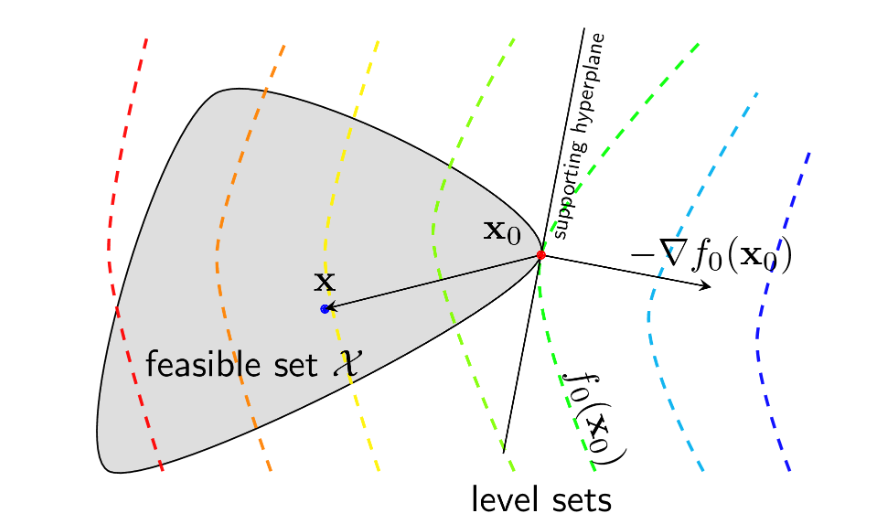

If $x_0$ is a optimal then with any $x \in \mathcal{X}$, vector going from $x_0$ to $x$ concatenated with the vector $- \nabla f_0(x_0)$ a obtuse angle. In other words, if we draw a tangent line at $x_0$, then the tangent line is always below the graph of the function. Beside, the feasible set is convex.

# Linear Programming

Let's us start with the basic of convex optimization: **Linear Programming** (In some other source, it called **Linear Program** or **LP**), where objective function $f_0$ and inequallity constraint functions $f_i$ are linear functions plus a constant.

##### General form of Linear Programming

$$
x = \arg \min c^Tx + d\\
\begin{align*}
\text{subject to: } &Gx \preceq h \\
&Ax = b
\end{align*}
$$

Where:
- $G \in \mathbb{R}^{m \times n}, h \in \mathbb{R}^m$ are matrix and vector of inequality constraints.
- $A \in \mathbb{R}^{p \times n}, b \in \mathbb{R}^p$ are matrix and vector of equality constraints.
- $c, x \in \mathbb{R}^n$ and $d$ are vector and scalar.

Note that: $d$ constant can be ignored because it doesn't affect the optimal solution.

##### Standard form of Linear Programming

In standard form LP, all equality constraints are only the condition that the solutions have non-negative components:

$$
x = \arg \min_x c^Tx\\
\begin{align*}
\text{subject to: } Gx &\preceq h \\
x &\succeq 0
\end{align*}
$$

We can convert general form to standard form by adding a slack variable $s$:

$$
x = \arg \min c^Tx\\
\begin{align*}
\text{subject to: } Gx + s &= h \\
Ax &= b \\
s &\succeq 0
\end{align*}
$$

Continue with that, if we represent $x$ under the form of two vector which each part of $x$ is non-negative, which is $x = (x^+, x^-)$, then we can rewrite the it as:

$$
x = \arg \min c^Tx^+ - c^Tx^-\\
\begin{align*}
\text{subject to: } G^+x^+ - G^-x^- + s &= h \\
A^+x^+ - A^-x^- &= b \\
x^+, x^-, s &\succeq 0
\end{align*}
$$

Which can be simplified to Standard form LP.

### Desmonstrate the optimal solution of LP using geometry

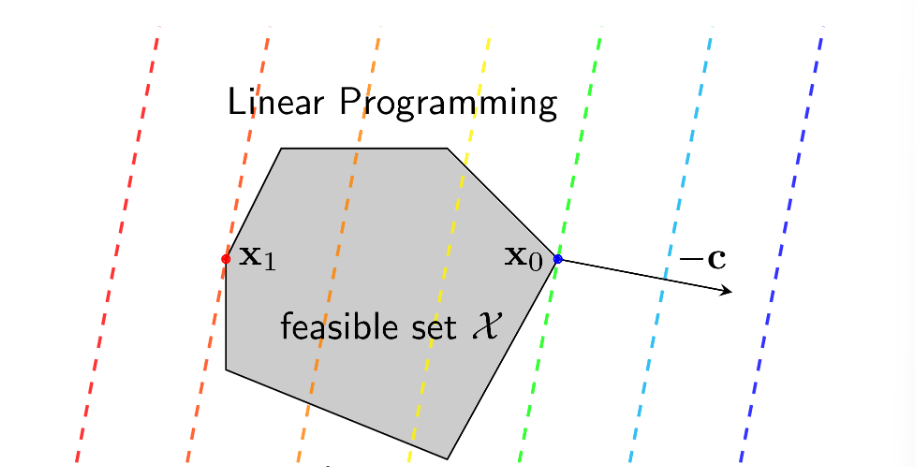

Point $x_0$ is a optimal solution where the objective function is minimized, $x_1$ otherwise. For LP problems, the solution, if it exists, is usually a point at the vertex of the polyhedron or a face of the polyhedron (in which case the level sets of the objective function are parallel to that face, and on that face the objective function is optimal).

There are many real-world problems that can be reduced to LP form. The method commonly used to solve these problems is called **simplex**.

# Quadratic Programming

### Definition

One form of Convex Optimization that you will encounter a lot is Quadratic Programming (QP, or Quadratic Program). The only difference between QP and LP is that the objective function has a Quadratic form:

$$
x = \arg \min \frac{1}{2}x^TPx + q^Tx + r\\
\begin{align*}
\text{subject to: } &Gx \preceq h \\
&Ax = b
\end{align*}
$$

Where $P \in \mathbb{S}^n_+$ (positive semi-definite matrix), $G \in \mathbb{R}^{m \times n}$, $A \in \mathbb{R}^{p \times n}$. P must be positive semi-definite to ensure that the objective function is convex.

LP is a special case of QP when $P = 0$.

In words: in QP, we minimize a convex quadratic function on a polyhedron. See the figure below:

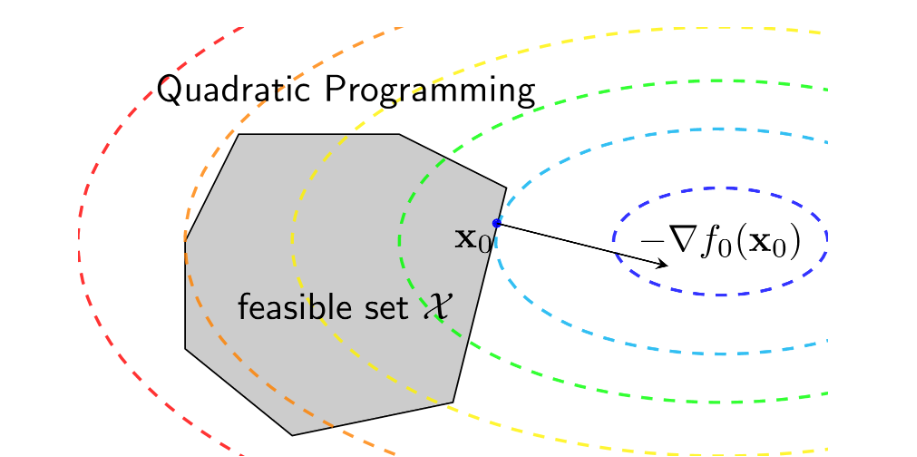

### Example

Fun problem: There is an island whose shape is a convex polygon. A boat at sea should take which direction to reach the island fastest, assuming that the speed of the waves and wind is 0.

The problem of the distance from a point to a polyhedron is stated as follows:

Given a polyhedron represented by $Ax \preceq b$ and a point $u$, find $x \in$ polyhedron such that the Euclidiean distance between $x$ and $u$ is minimized.

This problem can be formulated as a QP problem:

$$
x = \arg \min \frac{1}{2}||x - u||_2^2\\
\begin{align*}
\text{subject to: } &Gx \preceq h
\end{align*}

The objective function has a minimum value of 0 if $u$ is inside the polyhedron and optimal solution is $x = u$. Otherwise, the optimal solution is the point on the polyhedron closest to $u$.

$$
\frac{1}{2} \|x - u\|_2^2 = \frac{1}{2} (x - u)^T(x - u) = \frac{1}{2} x^Tx - x^Tu + \frac{1}{2} u^Tu

This formulates a QP problem with $P = I, q = -u, r = \frac{1}{2}u^Tu$.

# Geometric Programming

### Monomials and posynomials

A function $f: \mathbb{R}^n \to \mathbb{R}$ with domain $dom f = \mathbb{R}^n_{++}$ have form:

$$
f(x) = cx_1^{a_1}x_2^{a_2}...x_n^{a_n}
$$

Where $c > 0$ and $a_1, a_2, ..., a_n$ are constants and $\in \mathbb{R}$. This function is called a **monomial**.

Sum of the monomials:

$$
f(x) = \sum_{k = 1}^K c_kx_1^{a_{k1}}x_2^{a_{k2}}...x_n^{a_{kn}}
$$

where $c_k > 0$, also called **posynomial function** or **posynomial**.

### Geometric Programming

General form of Geometric Programming (GP) problem:

$$
x = \arg \min f_0(x)\\
\begin{align*}
\text{subject to: } &f_i(x) \leq 1, i = 1, 2, ..., m\\
&h_j(x) = 1, j = 1, 2, ..., n
\end{align*}
$$

Where $f_0, f_1, ..., f_m$ are posynomial functions and $h_1, h_2, ..., h_n$ are monomial functions. And $x \succ 0$ is a hidden constraint.

Attention that, if $f$ is posynomial, $h$ is monomial, then $f/h$ is posynomial.

***Example***

$$
(x, y, z) = \arg \min_{x, y, z} \frac{x}{y} \\
\begin{align*}
\text{subject to: } &1 \leq x \leq 2\\
&x^3 + 2\frac{y}{z} \leq \sqrt{y}\\
&\frac{x}{y} = z
\end{align*}
$$

Can be rewritten into GP form:

$$
(x, y, z) = \arg \min_{x, y, z} xy^{-1} \\
\begin{align*}
\text{subject to: } &x^-1 \leq 1\\
&\frac{1}{2}x \leq 1\\
&x^3y^{-\frac{1}{2}} + 2y^{\frac{1}{2}}z^{-1} \leq 1\\
&xy^-1z^{-1} = 1
\end{align*}
$$

This problem definitely is non-convex, because both the objective function and the constraints are not convex.

### Convert GP to Convex form

Set $y_i = \log(x_i)$, thus $x_i = \exp(y_i)$. If $f$ is a **monomial function** of $x$ then:

$$f(x) = c(\exp(y_1))^{a_1} \cdots (\exp(y_n))^{a_n} = \exp(a^Ty + b)$$

With $b = \log(c)$. Now, function $g(y) = \exp(a^Ty + b)$ is a convex function of $y$.

Same with **posynomial function**, we can convert it to convex form by taking the logarithm of the function:

$$
\begin{align*}
f(x) &= \sum_{k = 1}^K c_kx_1^{a_{k1}}x_2^{a_{k2}}...x_n^{a_{kn}}
&= \sum_{k = 1}^K \exp(a_k^Ty + b_k)
\end{align*}
$$

Where $a_k = [a_{k1}, a_{k2}, ..., a_{kn}]^T$ and $b_k = \log(c_k)$. Now the posynomial is written as the sum of the $\exp$ functions of the affine functions

GP Problem can be rewrote as:

$$
y = \arg \min_y \sum_{k = 1}^{K_0} \exp(a_{0k}^Ty + b_{0k})\\
\begin{align*}
\text{subject to: } &\sum_{k = 1}^{K_i} \exp(a_{ik}^Ty + b_{ik}) \leq 1, \quad i = 1, \cdots, m \\
&\exp(g_{j}^Ty + h_{j}) = 1, \quad j = 1, \cdots, p
\end{align*}
$$

with $a_{ik} \in \mathbb{R}^n, i = 1, \cdots, p$ and $g_i \in \mathbb{R}^n$

Note that $\log\sum_{i = 1}^m \exp(g_i(x))$ is convex if $g_i$ is convex function. Continue to transform this problem into a convex optimization problem:

$$
\min_y \tilde{f}_0(y) = \log\sum_{k = 1}^{K_0} \exp(a_{0k}^Ty + b_{0k})\\
\begin{align*}
\text{subject to: } \tilde{f}_i(y) &= \log\sum_{k = 1}^{K_i} \exp(a_{ik}^Ty + b_{ik}) \leq 0, \quad i = 1, \cdots, m \\
\tilde{h}_j(y) &= \log\exp(g_{j}^Ty + h_{j}) = 0, \quad j = 1, \cdots, p
\end{align*}
$$

At this point, we can say that the GP is equivalent to a convex optimization problem because the objective function and the constraint inequality functions, and the final equality condition are in affine form. This form is often called a geometric program in convex form.